In [586]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt


In [587]:
file = Path(r"C:\Users\lunar01\project1-team2\project1-team2\datasources\economy_foreign_trade_mun_2024-07-17T02_19_32.214Z.csv")

open(file)

tradedf = pd.read_csv(file)

tradedf.head()


,Country ID,Country,Year,State ID,State,Chapter 2 Digit ID,Chapter 2 Digit,Trade Value
0,abw,Aruba,2006,1,Aguascalientes,11,Textiles,110
1,abw,Aruba,2006,1,Aguascalientes,15,Metals,3800
2,abw,Aruba,2006,1,Aguascalientes,16,Machines,7
3,abw,Aruba,2006,2,Baja California,7,Plastics and Rubbers,2625
4,abw,Aruba,2006,2,Baja California,9,Wood Products,37


In [588]:
del tradedf["State ID"]
del tradedf["State"]
del tradedf["Country"]
del tradedf["Country ID"]
del tradedf["Chapter 2 Digit ID"]

totaltradedf = tradedf.groupby(["Chapter 2 Digit"]).sum().reset_index()
del totaltradedf["Year"]

totaltradeorderdf = totaltradedf.sort_values(by="Trade Value", ascending = False)

tradedfgrouped = tradedf.groupby(["Chapter 2 Digit", "Year"]).sum().reset_index()

tradedfgrouped.head()

,Chapter 2 Digit,Year,Trade Value
0,Animal Hides,2006,1492634110
1,Animal Hides,2007,1325192018
2,Animal Hides,2008,1271509842
3,Animal Hides,2009,956575476
4,Animal Hides,2010,1287032308


In [589]:
tradedfgrouped = tradedf.groupby(["Chapter 2 Digit", "Year"]).sum().reset_index()

tradedfgroupedtop5 = tradedfgrouped[(tradedfgrouped["Chapter 2 Digit"] == "Machines") |
    (tradedfgrouped["Chapter 2 Digit"] == "Transportation") |
    (tradedfgrouped["Chapter 2 Digit"] == "Mineral Products") |
    (tradedfgrouped["Chapter 2 Digit"] == "Metals") |
    (tradedfgrouped["Chapter 2 Digit"] == "Plastics and Rubbers")]

tradedfgroupedtop5.head()

,Chapter 2 Digit,Year,Trade Value
152,Machines,2006,183015055061
153,Machines,2007,198797742079
154,Machines,2008,210153959187
155,Machines,2009,174033113214
156,Machines,2010,226809844311


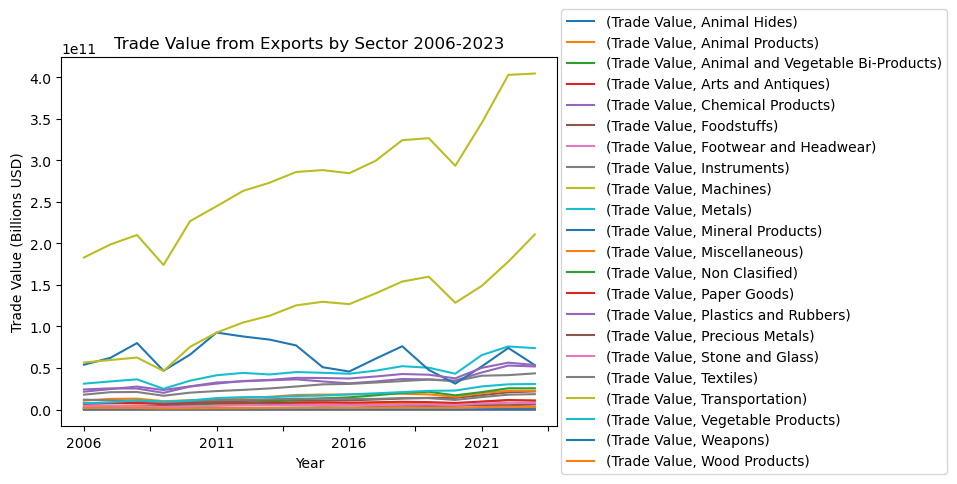

<Figure size 640x480 with 0 Axes>

In [590]:
tradedfgrouped = tradedf.groupby(["Chapter 2 Digit", "Year"]).sum().reset_index()

dictionary2 = {
    "Trade Value" : tradedfgrouped["Trade Value"],
    "Year" : tradedfgrouped["Year"],
    "Chapter 2 Digit" : tradedfgrouped["Chapter 2 Digit"]
    }

tradedfgrouped['Year'] = tradedfgrouped['Year'].astype(str)

df = pd.DataFrame(dictionary1) # type: ignore

df = df[df["Year"]<= 2023]

df["Year"] = df["Year"].astype(str)

years = df["Year"]

df = df.set_index(["Year", "Chapter 2 Digit"]).unstack()

df.head()

df.plot()

plt.legend(loc="right", bbox_to_anchor = (1.8, 0.5))
plt.ylabel("Trade Value (Billions USD)")
plt.title("Trade Value from Exports by Sector 2006-2023")

plt.show()

plt.savefig("YearTradeValue.png")


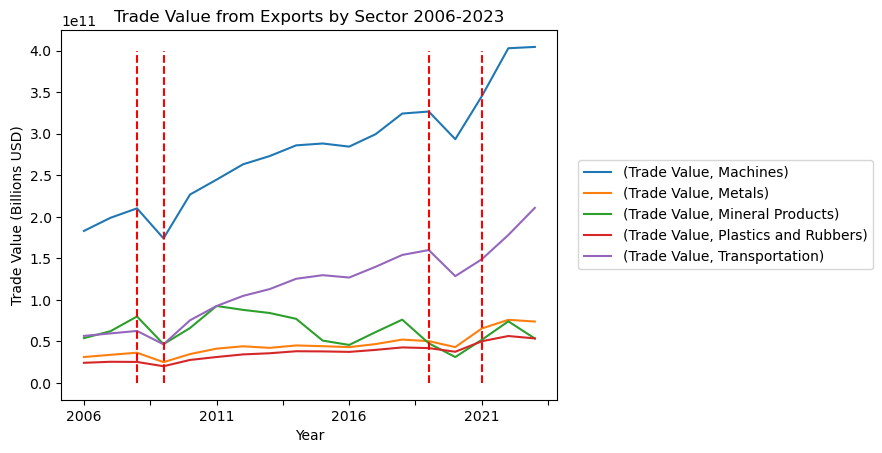

<Figure size 640x480 with 0 Axes>

In [591]:

dictionary2 = {
    "Trade Value" : tradedfgroupedtop5["Trade Value"], # type: ignore
    "Year" : tradedfgroupedtop5["Year"], # type: ignore
    "Chapter 2 Digit" : tradedfgroupedtop5["Chapter 2 Digit"] # type: ignore
    }

tradedfgroupedtop5['Year'] = tradedfgroupedtop5['Year'].astype(str) # type: ignore

df = pd.DataFrame(dictionary2)

df = df[df["Year"]<= 2023]

df["Year"] = df["Year"].astype(str)

years = df["Year"]

df = df.set_index(["Year", "Chapter 2 Digit"]).unstack()

df.head()

df.plot()

plt.legend(loc="right", bbox_to_anchor = (1.65, 0.5))
plt.ylabel("Trade Value (Billions USD)")
plt.title("Trade Value from Exports by Sector 2006-2023")

plt.vlines(x = [2, 3, 13, 15], ymin=0 , ymax=400000000000, linestyles="dashed", colors="red")

plt.show()

plt.savefig("YearTradeValue.png")

<function matplotlib.pyplot.show(close=None, block=None)>

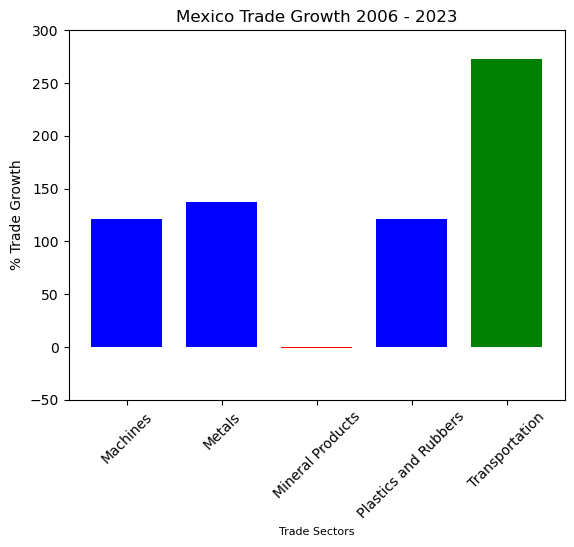

In [616]:
tradedfgroupedtop52006 = tradedfgroupedtop5[tradedfgroupedtop5["Year"]=="2006"]
tradedfgroupedtop52023 = tradedfgroupedtop5[tradedfgroupedtop5["Year"]=="2023"]
mergedf = pd.merge(tradedfgroupedtop52006,tradedfgroupedtop52023, on="Chapter 2 Digit")
mergedf["Trade Value"] = mergedf["Trade Value_y"] -  mergedf["Trade Value_x"]
mergedf["Trade Value Growth"] = mergedf["Trade Value"] * 100 / mergedf["Trade Value_x"]

del mergedf["Trade Value_x"]
del mergedf["Trade Value_y"]
del mergedf["Year_x"]
del mergedf["Year_y"]

mergedf.head()

colors = ["blue", "blue", "red", "blue", "green"]

plt.bar(mergedf["Chapter 2 Digit"],mergedf["Trade Value Growth"],width=0.75, color = colors)
plt.ylim(-50,300)
plt.xlabel("Trade Sectors",fontsize = 8)
plt.xticks(rotation=45)
plt.ylabel("% Trade Growth")
plt.title("Mexico Trade Growth 2006 - 2023")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

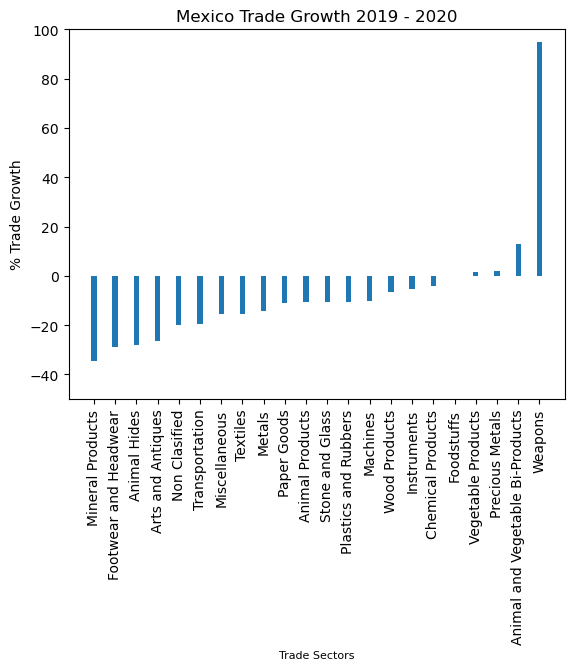

In [624]:
tradedfgroupedtop52019 = tradedfgrouped[tradedfgrouped["Year"]=="2019"]
tradedfgroupedtop52020 = tradedfgrouped[tradedfgrouped["Year"]=="2020"]
mergedf = pd.merge(tradedfgroupedtop52019,tradedfgroupedtop52020, on="Chapter 2 Digit")
mergedf["Trade Value"] = mergedf["Trade Value_y"] -  mergedf["Trade Value_x"]
mergedf["Trade Value Growth"] = mergedf["Trade Value"] * 100 / mergedf["Trade Value_x"]

mergedf = mergedf.sort_values(by="Trade Value Growth", ascending = True)

del mergedf["Trade Value_x"]
del mergedf["Trade Value_y"]
del mergedf["Year_x"]
del mergedf["Year_y"]

mergedf.head()

plt.bar(mergedf["Chapter 2 Digit"],mergedf["Trade Value Growth"],width=0.25)
plt.ylim(-50,100)
plt.xlabel("Trade Sectors",fontsize = 8)
plt.xticks(rotation=90)
plt.ylabel("% Trade Growth")
plt.title("Mexico Trade Growth 2019 - 2020")

plt.show